In [64]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plot
import seaborn as sns

import riskfolio as rp
from openbb_terminal.sdk import openbb
from openbb_terminal.sdk import TerminalStyle
theme = TerminalStyle("light", "light", "light")

from datetime import date
from datetime import timedelta

In [107]:
# Setting-up the dataframes
my_df = Path('../Resources/portfolio_eli.csv')
omar_df = Path('../Resources/portfolio_omar.csv')
eamonn_df = Path('../Resources/portfolio_eamonn.csv')

# Clean the data
my_portfolio = pd.read_csv(my_df, index_col='Stock')
my_portfolio['Weight'] = my_portfolio['Weight'].str.replace('%','').astype('float') / 100

omar_portfolio = pd.read_csv(omar_df, index_col='Stock')
omar_portfolio['Weight'] = omar_portfolio['Weight'].str.replace('%','').astype('float') / 100

eamonn_portfolio = pd.read_csv(eamonn_df, index_col='Stock')
eamonn_portfolio['PortFolio Weight'] = eamonn_portfolio['PortFolio Weight'].str.replace('%','').astype('float') / 100

# Adding the data into lists
my_stock_tickers = my_portfolio['Ticker'].tolist()
my_stock_weights = my_portfolio['Weight'].tolist()

omar_stock_tickers = omar_portfolio['Ticker'].tolist()
omar_stock_weights = omar_portfolio['Weight'].tolist()

eamonn_stock_tickers = eamonn_portfolio['Ticker'].tolist()
eamonn_stock_weights = eamonn_portfolio['PortFolio Weight'].tolist()

In [124]:
# Setup for end_date, calling on last full day.
today = date.today()

# Getting the initial date ranges for review
startdate = date(2018,1,1)
end_date = today - timedelta(days = 1)
print(end_date)
print(f'There are {len(my_stock_tickers)} individual stocks in your portfolio')

2023-02-13
There are 6 individual stocks in your portfolio


In [125]:
my_data = openbb.economy.index(my_stock_tickers, start_date=startdate, end_date=end_date)

In [87]:
omar_data = openbb.economy.index(omar_stock_tickers, start_date=startdate, end_date=end_date)

In [78]:
eamonn_data = openbb.economy.index(eamonn_stock_tickers, start_date=startdate, end_date=end_date)

In [126]:
# Getting Daily Returns for All Portfolios
my_daily_returns = my_data.pct_change()
my_daily_returns = my_daily_returns.dropna()
my_portfolio_returns = my_daily_returns.dot(my_stock_weights)

omar_stock_daily_returns = omar_data.pct_change()
omar_stock_daily_returns = omar_stock_daily_returns.dropna()
omar_portfolio_returns = omar_stock_daily_returns.dot(omar_stock_weights)

eamonn_stock_daily_returns = eamonn_data.pct_change()
eamonn_stock_daily_returns = eamonn_stock_daily_returns.dropna()
eamonn_portfolio_returns = eamonn_stock_daily_returns.dot(eamonn_stock_weights)

In [127]:
sap_ticker = ['SPY']

sap_data = openbb.economy.index(sap_ticker, start_date=startdate, end_date=end_date)
sap_daily_returns = sap_data.pct_change()
sap_daily_returns = sap_daily_returns.dropna()
sap_daily_returns

,SPY
Date,
2018-01-03,0.006325
2018-01-04,0.004215
2018-01-05,0.006664
2018-01-08,0.001829
2018-01-09,0.002263
...,...
2023-02-06,-0.006111
2023-02-07,0.013079
2023-02-08,-0.010935


In [128]:
combined_df = pd.concat([my_portfolio_returns, omar_portfolio_returns, eamonn_portfolio_returns, sap_daily_returns], axis='columns', join='inner')
combined_df.rename(columns={0:'My Portfolio Returns',1:'Omars Returns',2:'Eamonns Returns'}, inplace=True)
combined_df

,My Portfolio Returns,Omars Returns,Eamonns Returns,SPY
Date,,,,
2020-12-11,-0.000582,0.000239,-0.001965,-0.001172
2020-12-14,0.000394,-0.001890,-0.009782,-0.004477
2020-12-15,0.016603,0.006473,0.011737,0.013520
2020-12-16,0.004178,0.003867,-0.002651,0.001569
2020-12-17,0.009177,0.010483,0.000551,0.005592
...,...,...,...,...
2023-02-06,-0.009951,-0.006124,-0.006075,-0.006111
2023-02-07,0.017503,0.012402,0.002605,0.013079
2023-02-08,-0.013095,-0.012227,-0.005625,-0.010935


<Axes: xlabel='Date'>

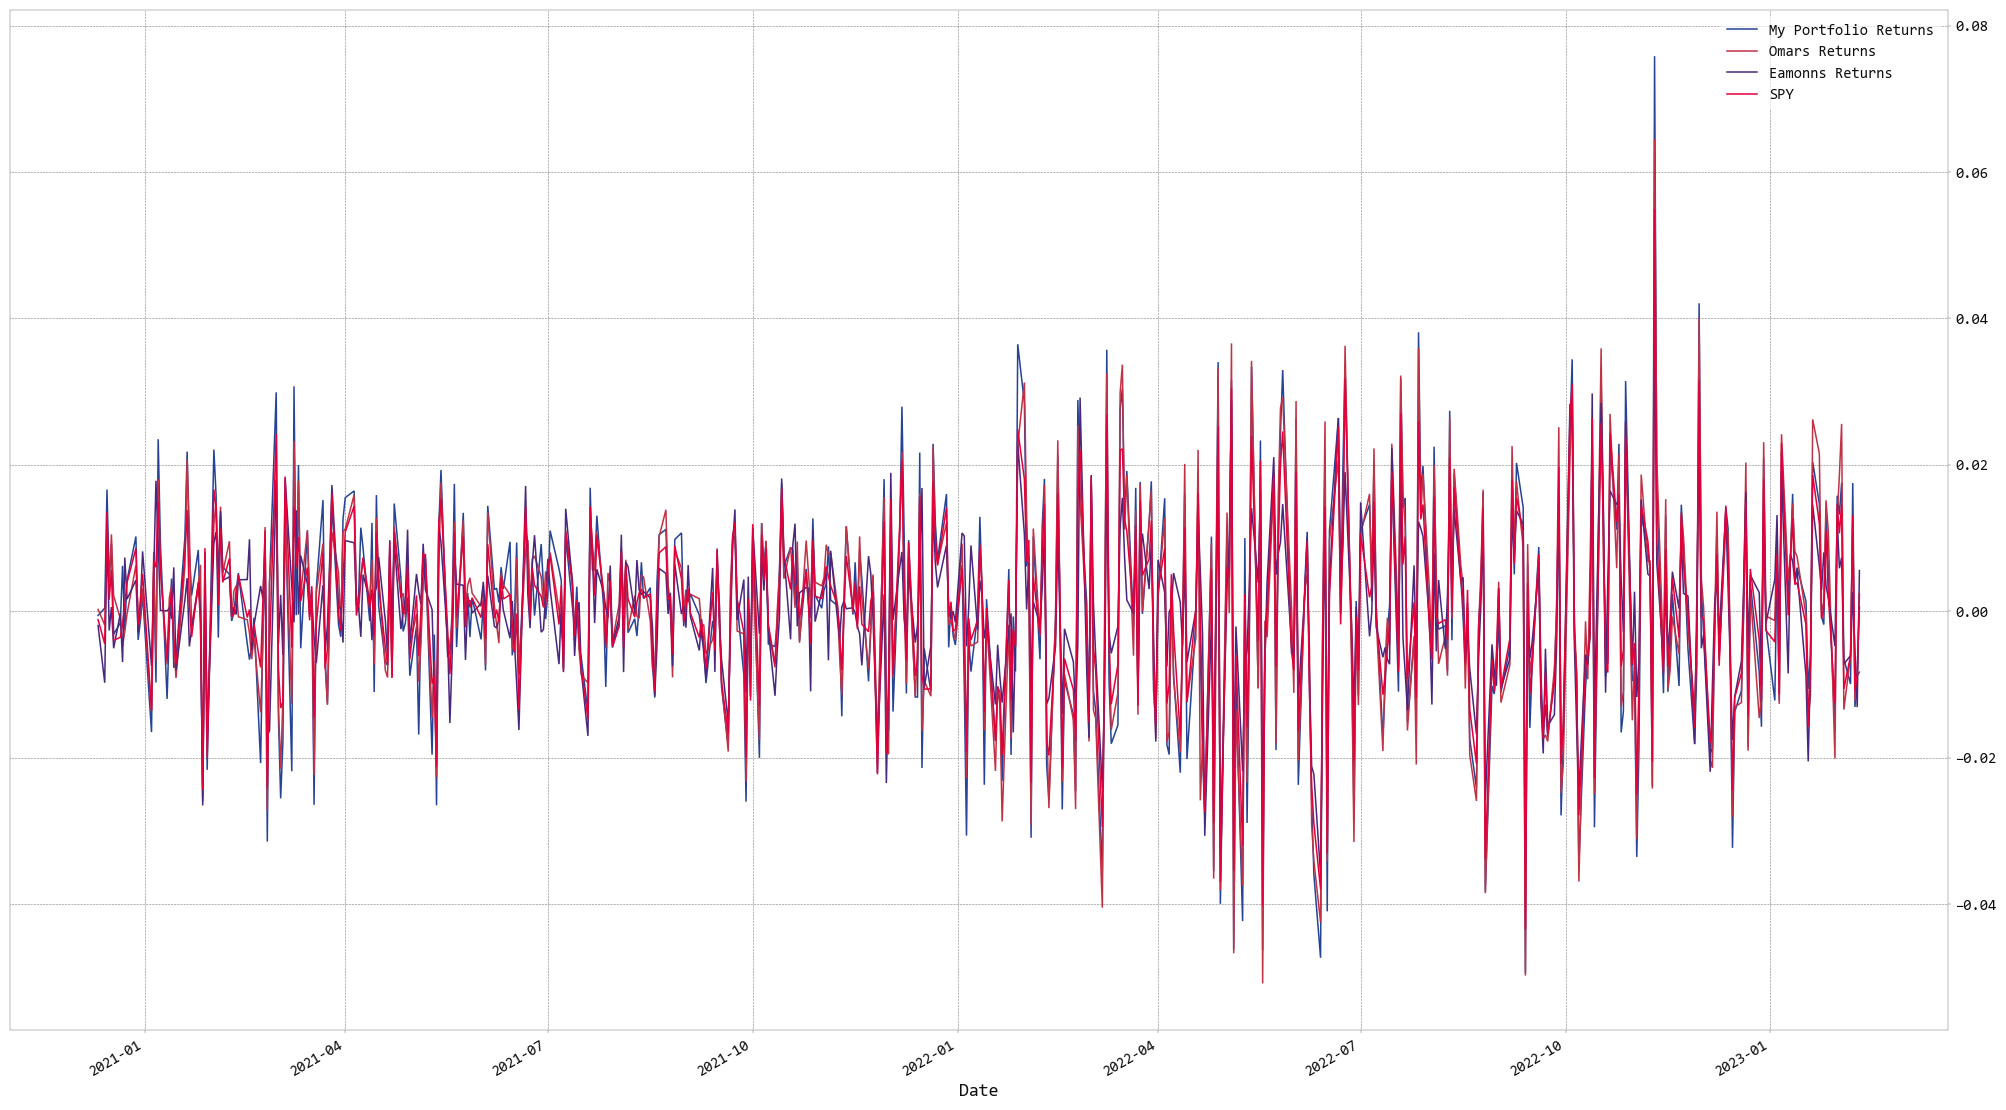

In [122]:
combined_df.plot(figsize=(25,15))

In [113]:
portfolio_std = pd.DataFrame(combined_df.std())
portfolio_std = portfolio_std.rename(columns= {0:'Standard Deviation'})
portfolio_std

,Standard Deviation
My Portfolio Returns,0.015134
Omars Returns,0.014481
Eamonns Returns,0.010151
SPY,0.012046


<Axes: xlabel='Date'>

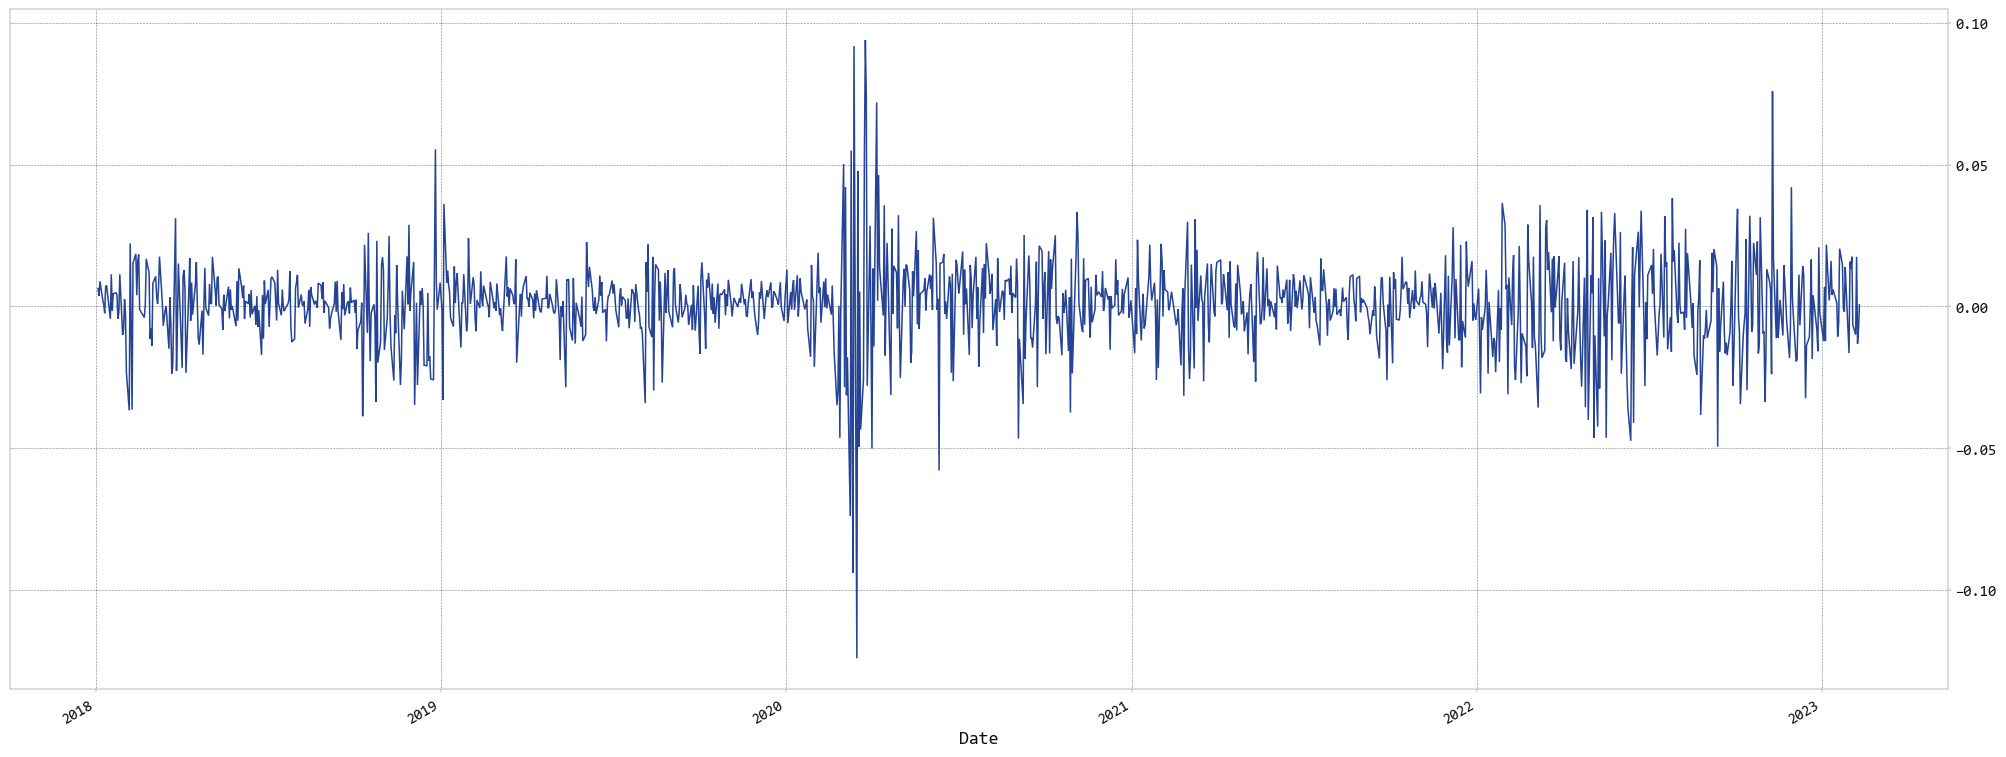

In [114]:
my_portfolio_returns.plot(
    figsize=(25,10)
)

In [116]:
# Lets Test Our Portfolios
initial_investment = 10000

<Axes: title={'left': 'Eli'}, xlabel='Date'>

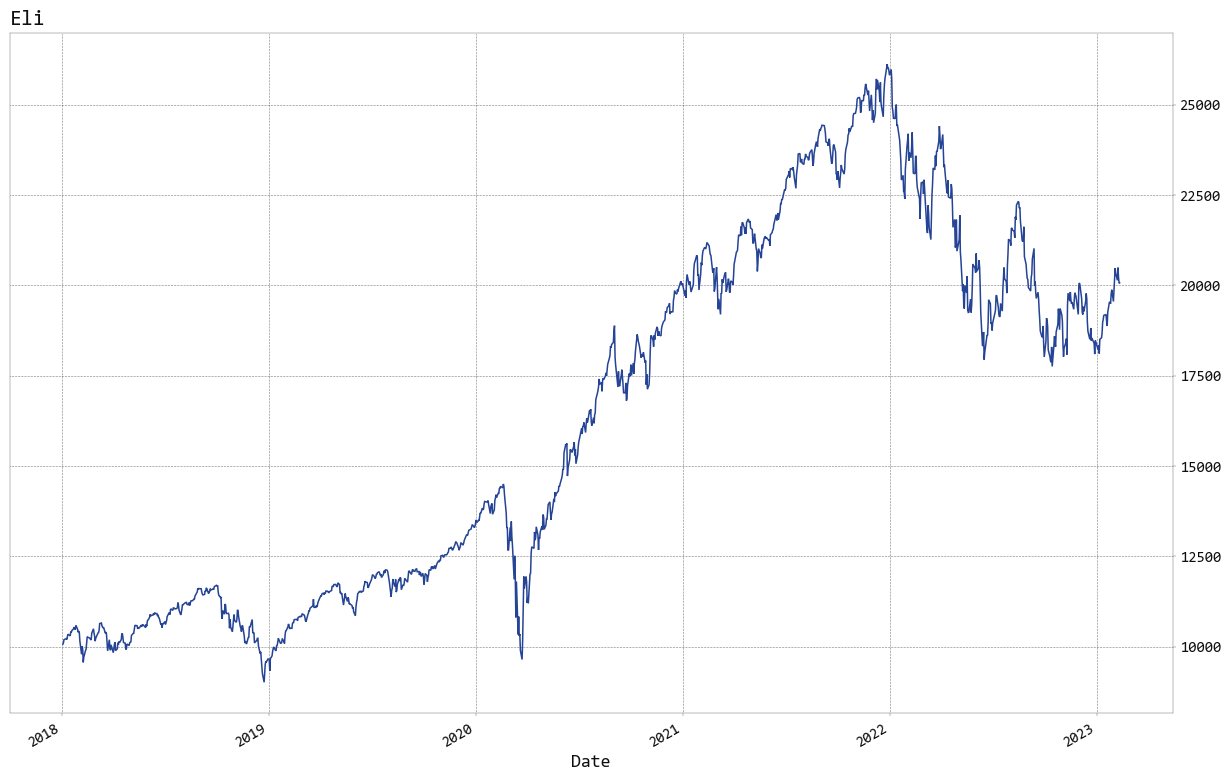

In [131]:
cummulative_returns = (1 + my_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Eli",
    figsize = (15, 10)
)

<Axes: title={'left': 'Omar'}, xlabel='Date'>

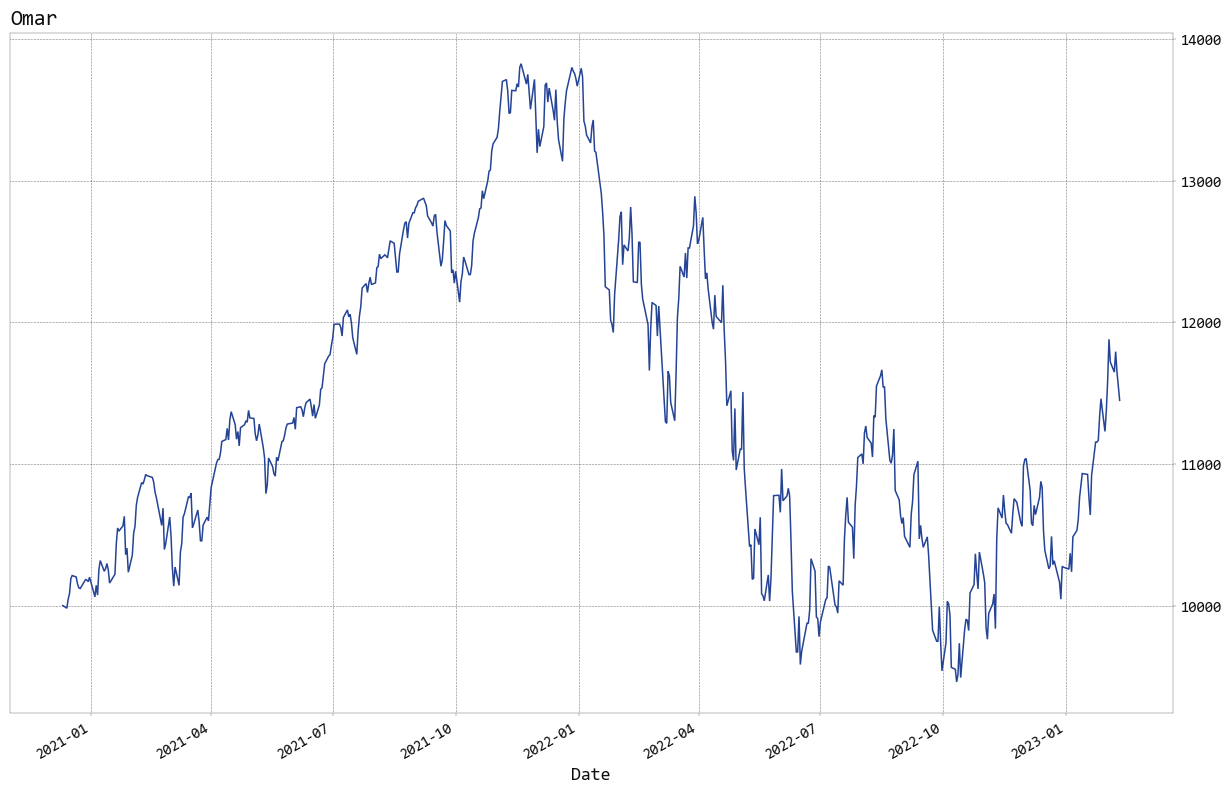

In [118]:
cummulative_returns = (1 + omar_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Omar",
    figsize = (15, 10)
)

<Axes: title={'left': 'Eamonn'}, xlabel='Date'>

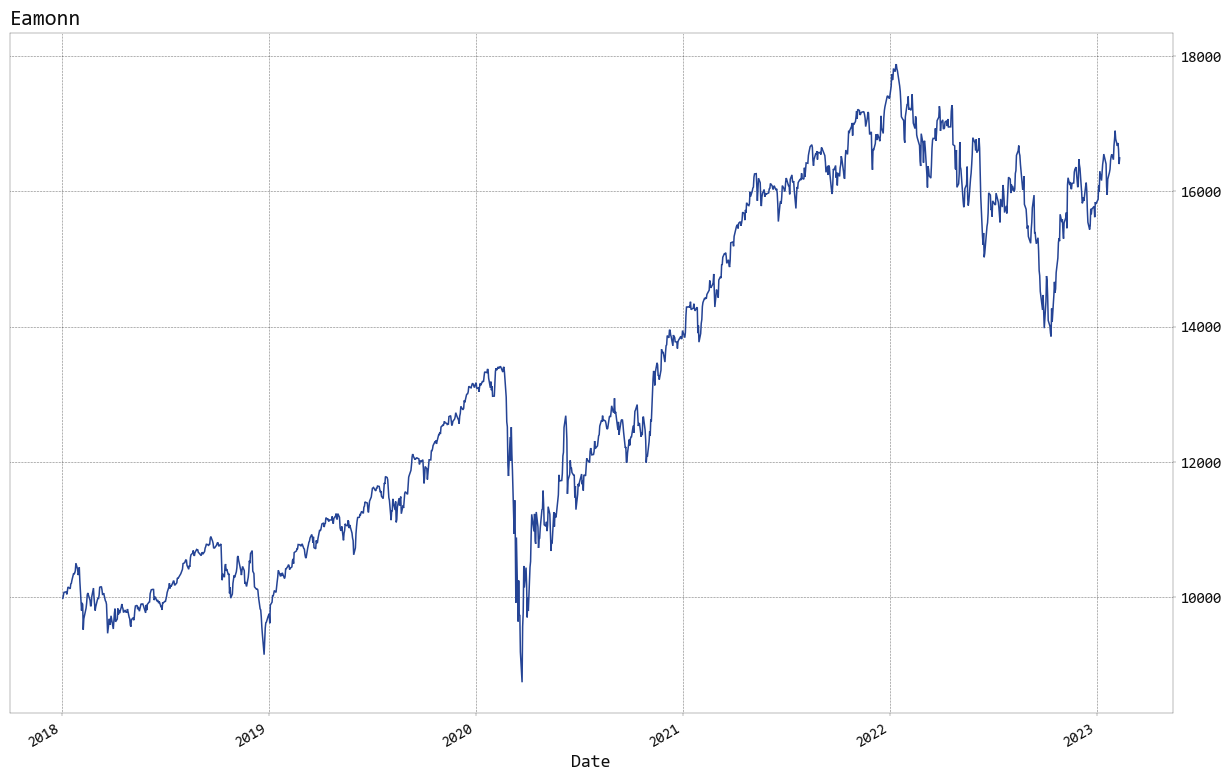

In [132]:
cummulative_returns = (1 + eamonn_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Eamonn",
    figsize = (15, 10)
)